In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import rand_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
import pandas as pd
from numpy.random import uniform
import matplotlib.pyplot as plt
from random import random
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iris_ds = load_iris()
customers_ds = pd.read_csv("customers.csv").drop(["Row", "CustomerId"], axis=1)


ds = "iris"

if ds == "iris":
    X = iris_ds['data'][:,:3]
    y = iris_ds['target']
elif ds == "customers":
    customers_ds = customers_ds[~customers_ds.Defaulted.isna()]
    X = customers_ds[['Income', "CardDebt", "OtherDebt"]].values
    y = customers_ds['Defaulted'].values
    
    
X = scaler.fit_transform(X)

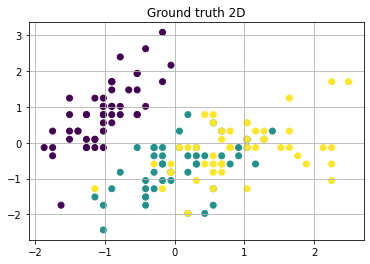

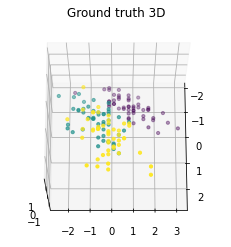

In [3]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c= y)
plt.grid()
plt.title("Ground truth 2D")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c= y, s=10)
plt.grid()
plt.title("Ground truth 3D")
ax.view_init(elev=70, azim=0)

In [4]:
def plot_dendrogram(model, p=3, **kwargs):
  # Create linkage matrix and then plot the dendrogram
  # create the counts of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for (i, merge) in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count
  linkage_matrix = np.column_stack([model.children_,
      model.distances_, counts]).astype(float)
  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

linkage: ward, metric: 0.7629530201342282
linkage: complete, metric: 0.7242953020134228
linkage: average, metric: 0.7762863534675615
linkage: single, metric: 0.7629530201342282


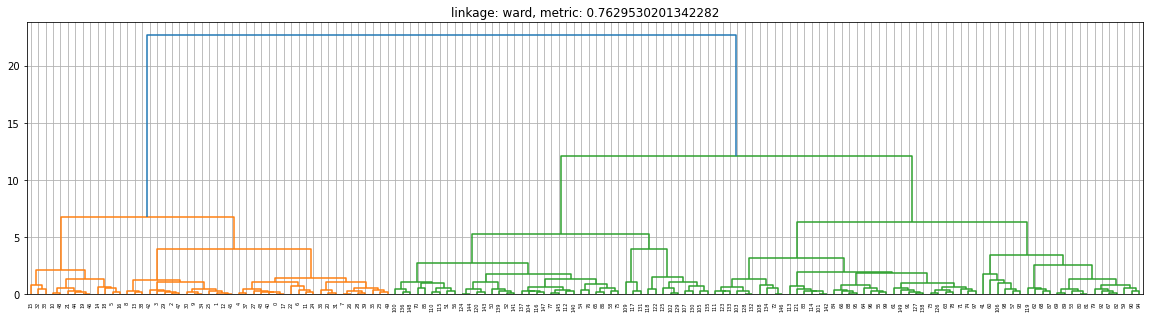

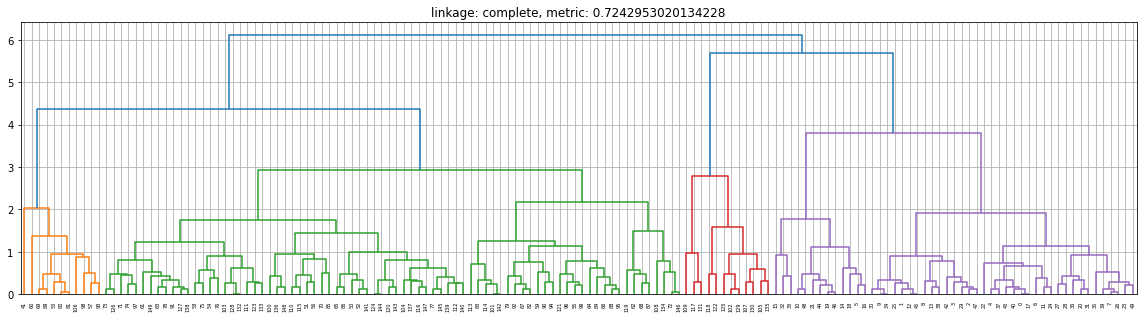

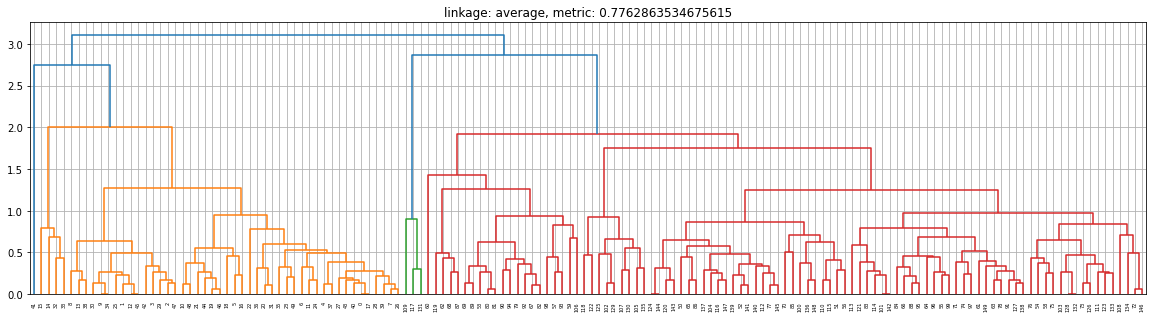

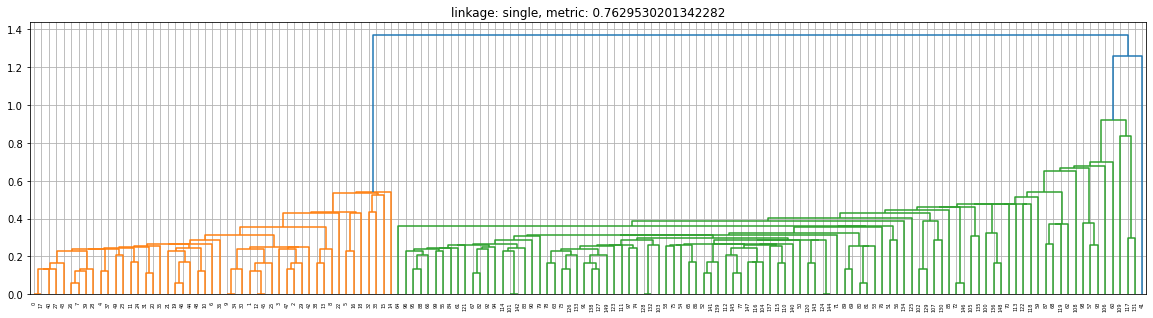

In [5]:
scores = []
n_cl = list(range(3,10))

for linkage in ['ward', 'complete', 'average', 'single']:
    km = AgglomerativeClustering(linkage=linkage, metric='euclidean', compute_distances=True)
    y_pred = km.fit_predict(X, y)
    ri_score = rand_score(y, y_pred)
    plot_name = f"linkage: {linkage}, metric: {ri_score}"
    print(plot_name)
    scores.append(ri_score)

    fig = plt.figure(figsize=(20,5))
    plot_dendrogram(km)
    plt.grid()
    plt.title(plot_name)
    
    
#     fig = plt.figure(figsize=(10,5))
#     №plt.scatter(X[:,0], X[:,1], c=y_pred)
#     plt.grid()
#     plt.title(plot_name)